In [1]:
# pip install -U pandas openpyxl networkx matplotlib openai
import csv
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

from IPython.display import display, Markdown 
from openai import AzureOpenAI

In [2]:
api_version = "2023-07-01-preview"
api_key = ""
api_endpoint = ""
completions_model = ""

deployment_client = AzureOpenAI(
    api_version=api_version,
    # https://learn.microsoft.com/en-us/azure/cognitive-services/openai/how-to/create-resource?pivots=web-portal#create-a-resource
    api_key=api_key,
    azure_endpoint=api_endpoint,
    # Navigate to the Azure OpenAI Studio to deploy a model.
    azure_deployment=completions_model,  # e.g. gpt-35-instant
)

api_key_long = ""
completions_model_long = ""

deployment_client_long = AzureOpenAI(
    api_version=api_version,
    # https://learn.microsoft.com/en-us/azure/cognitive-services/openai/how-to/create-resource?pivots=web-portal#create-a-resource
    api_key=api_key_long,
    azure_endpoint=api_endpoint,
    # Navigate to the Azure OpenAI Studio to deploy a model.
    azure_deployment=completions_model_long,  # e.g. gpt-35-instant
)

In [3]:
# Example Azure OpenAI conversation
def get_conversation(prompt, deployment_client):
    messages =[
        {
            "role": "system",  "content": "You are a helpful assistant and expert systems engineer with many years of experience with systems theoritic process analysis.",
            "role": "user",  "content": prompt,
        },
    ]

    completion = deployment_client.chat.completions.create(
        model="<ignored>",
        messages=messages,
    )
    # Extracting the content from the first choice's message
    message_content = completion.choices[0].message.content

    # Print the message content
    return(message_content)

def write_excel(table, filename):
    # Define the column names
    columns = ['interaction', 'hazard condition', 'hazardous scenarios', 'associated safeguards for the interaction']

    # Create a DataFrame from the table
    df = pd.DataFrame(table, columns=columns)

    # Write the DataFrame to an Excel file
    df.to_excel(filename, index=False)

# Constrol Structure Diagram of Engineering System

Original: 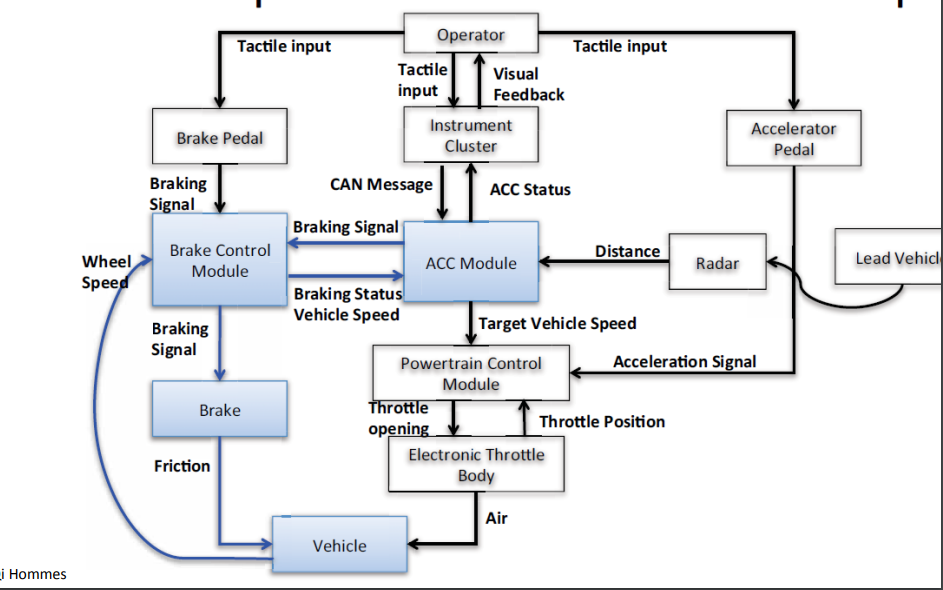

# Create a control struture model in python

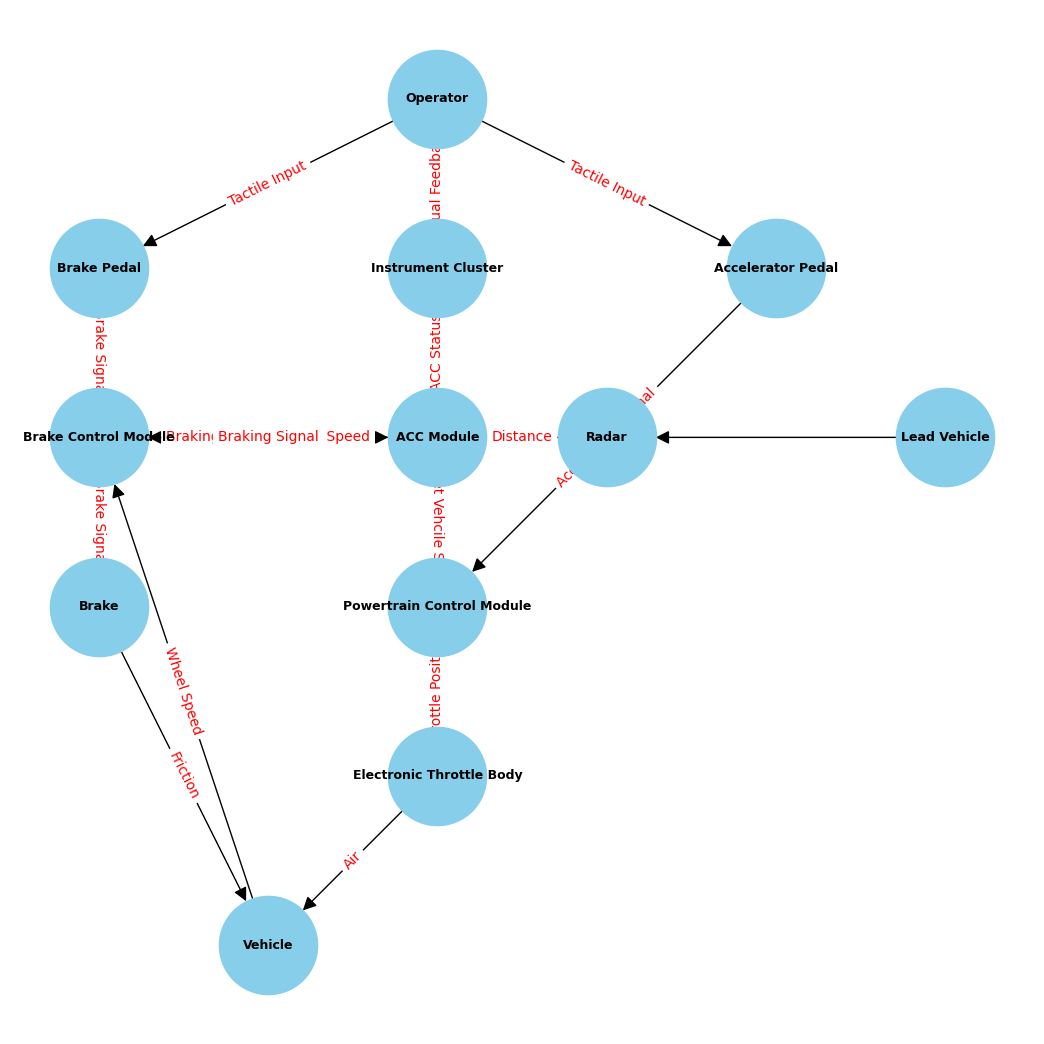

In [4]:
# Create a directed graph
G = nx.DiGraph()

# Define nodes with manual positions
positions = {
    "Operator": (3, 6),
    "Brake Pedal": (1, 5), "Instrument Cluster": (3, 5), "Accelerator Pedal": (5, 5),
    "Brake Control Module": (1, 4), "ACC Module": (3, 4), "Radar": (4, 4), "Lead Vehicle": (6, 4),
    "Brake": (1, 3), "Powertrain Control Module": (3, 3), 
    "Electronic Throttle Body": (3, 2),
    "Vehicle": (2, 1)
}

# Add nodes to the graph
G.add_nodes_from(positions.keys())

# Define edges
edges = [
    ("Operator", "Brake Pedal", "Tactile Input"), ("Operator", "Accelerator Pedal", "Tactile Input"), ("Operator", "Instrument Cluster", "Tactile Input"),
    ("Brake Pedal", "Brake Control Module", "Brake Signal"), ("Instrument Cluster", "Operator", "Visual Feedback"), ("Instrument Cluster", "ACC Module", "CAN Message"), ("Accelerator Pedal", "Powertrain Control Module", "Acceleration Signal"),
    ("Brake Control Module", "Brake", "Brake Signal"), ("Brake Control Module", "ACC Module", "Braking Status Vehicle Speed"), ("ACC Module", "Brake Control Module", "Braking Signal"), ("ACC Module", "Instrument Cluster", "ACC Status"), ("ACC Module", "Powertrain Control Module", "Target Vehcile Speed"), ("Radar", "ACC Module", "Distance"), ("Lead Vehicle", "Radar", ""),
    ("Brake", "Vehicle", "Friction"), ("Powertrain Control Module", "Electronic Throttle Body", "Throttle Opening"), 
    ("Electronic Throttle Body", "Vehicle", "Air"), ("Electronic Throttle Body", "Powertrain Control Module", "Throttle Position"),
    ("Vehicle", "Brake Control Module", "Wheel Speed")
]

# Add edges with labels
for edge in edges:
    G.add_edge(edge[0], edge[1], label=edge[2])

# Set the size of the plot
plt.figure(figsize=(10.24, 10.24), dpi=100)  # 10.24 inch by 10.24 inch image at 100 dpi

# Draw the graph with manual positions
nx.draw(G, positions, with_labels=True, node_size=5000, node_color='skyblue', font_size=9, font_weight='bold', arrowstyle='-|>', arrowsize=20)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, positions, edge_labels=edge_labels, font_color='red')

# Display the plot
plt.show()

# Generate the Unsafe Control Actions
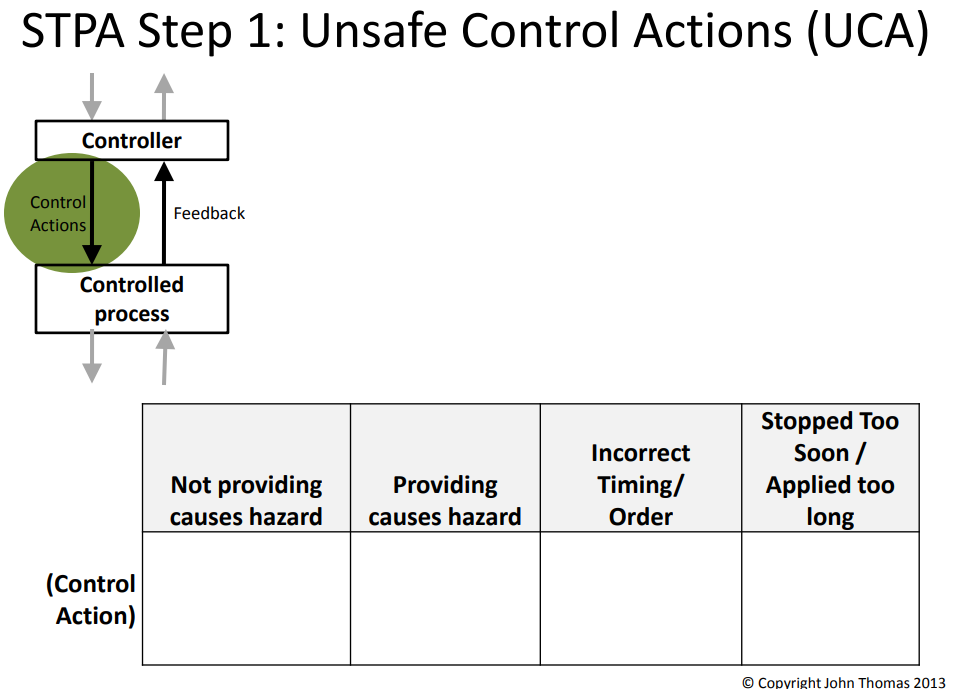

# Identify Accidents and Hazards
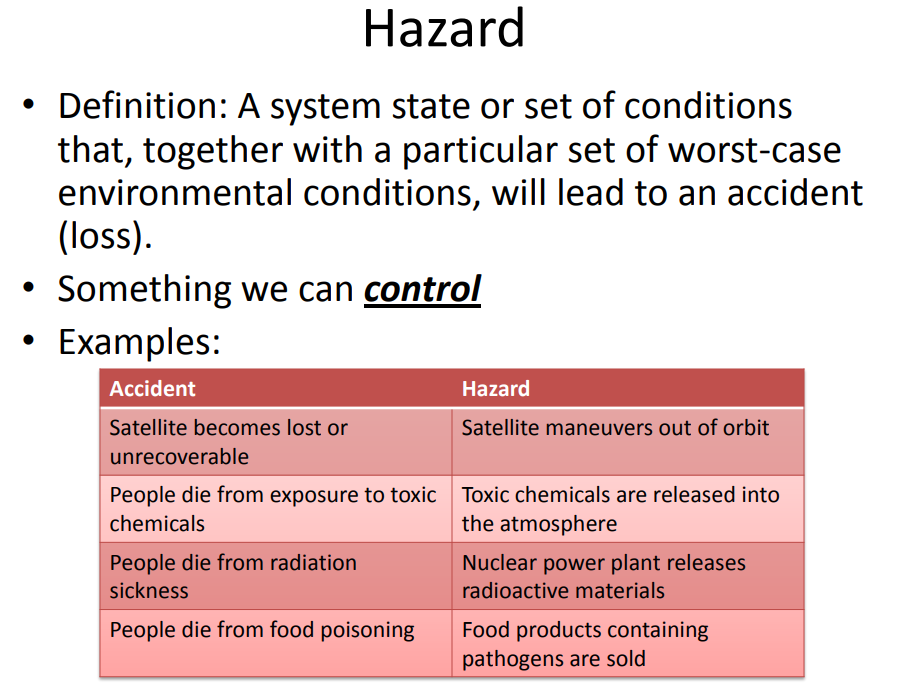

# Identify Safety Constraints (Safeguards)
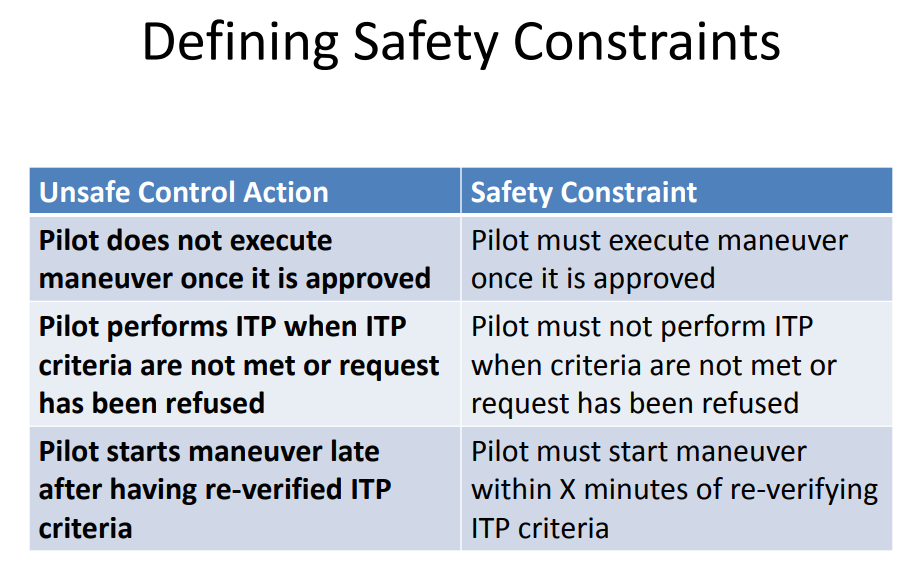

## With a systematic process, we can combine the unsafe control action identification with the associated accident and hazard, and safety constraints.

In [5]:
# Iterating over the edges to access source, target, and label
stpa_result_table = []
headers_text = "Include column headers"
for source, target, data in G.edges(data=True):
    edge_label = data.get('label', 'No Label')  # Default to 'No Label' if no label is present
    print(f"Source: {source}, Target: {target}, Edge Name: {edge_label}")
    x0, y0 = positions[source]
    x1, y1 = positions[target]

    # there are 3 types of interactions: feedback (up), control action (down) and i/O lateral
    if (x1 > x0): # control action
        prompt = f"Create a markdown table of interactions, hazard condition, accident, hazard, and safety constraint for the control action processing: {edge_label}.  This is an interaction of {source} to {target}.  There should be at least four hazardous scenarios as these can occur with any of the following conditions: the control occurs too fast/slow, control occurs in incorrect order, control causes a hazard, not providing the control causes the hazard. {headers_text}"
    elif (x1 < x0): # feedback
        prompt = f"Create a markdown table of interactions, hazard condition, accident, hazard, and safety constraint for the feedback processing: {edge_label}.  This is an interaction of {source} to {target}.  There should be at least four hazardous scenarios as these can occur with any of the following conditions: the control occurs too fast/slow, control occurs in incorrect order, control causes a hazard, not providing the control causes the hazard. {headers_text}"
    else: # input/output
        prompt = f"Create a markdown table of interactions, hazard condition, accident, hazard, and safety constraint for the input/output or signal processing: {edge_label}.  This is an interaction of {source} to {target}.  There should be at least four hazardous scenarios as these can occur with any of the following conditions: the control occurs too fast/slow, control occurs in incorrect order, control causes a hazard, not providing the control causes the hazard. {headers_text}"

    stpa_results = get_conversation(prompt, deployment_client)
    # do not include future column headers
    headers_text = "Do not include column headers."
          
    stpa_result_table.append(stpa_results)  # Append the remaining rows without the header  

Source: Operator, Target: Brake Pedal, Edge Name: Tactile Input
Source: Operator, Target: Accelerator Pedal, Edge Name: Tactile Input
Source: Operator, Target: Instrument Cluster, Edge Name: Tactile Input
Source: Brake Pedal, Target: Brake Control Module, Edge Name: Brake Signal
Source: Instrument Cluster, Target: Operator, Edge Name: Visual Feedback
Source: Instrument Cluster, Target: ACC Module, Edge Name: CAN Message
Source: Accelerator Pedal, Target: Powertrain Control Module, Edge Name: Acceleration Signal
Source: Brake Control Module, Target: Brake, Edge Name: Brake Signal
Source: Brake Control Module, Target: ACC Module, Edge Name: Braking Status Vehicle Speed
Source: ACC Module, Target: Brake Control Module, Edge Name: Braking Signal
Source: ACC Module, Target: Instrument Cluster, Edge Name: ACC Status
Source: ACC Module, Target: Powertrain Control Module, Edge Name: Target Vehcile Speed
Source: Radar, Target: ACC Module, Edge Name: Distance
Source: Lead Vehicle, Target: Radar,

In [6]:
for row in stpa_result_table:
    print(row)

| Interaction        | Hazard Condition          | Accident                                   | Hazard                               | Safety Constraint                                                                           |
|--------------------|---------------------------|--------------------------------------------|-------------------------------------|---------------------------------------------------------------------------------------------|
| Operator to Brake Pedal | Control occurs too fast      | Sudden braking leads to loss of control or rear-end collision | Unintended rapid deceleration      | Brake pedal should have progressive resistance to avoid abrupt braking                      |
| Operator to Brake Pedal | Control occurs too slow       | Inadequate braking distance, leading to collision             | Insufficient braking force          | Brake pedal should provide quick and efficient braking force in response to applied pressure |
| Operator to Brake Pedal | Cont

In [3]:
markdown_text = '''| Interaction          | Hazard Condition                  | Accident                                                         | Hazard                  | Safety Constraint                                  |
| -------------------- | ---------------------------------- | ---------------------------------------------------------------- | ----------------------- | -------------------------------------------------- |
| Operator to Brake Pedal | Control occurs too fast          | Driver applies brake pedal quickly, causing abrupt deceleration | Rapid deceleration      | Brake pedal must be applied gradually and smoothly |
| Operator to Brake Pedal | Control occurs too slow          | Delayed brake application leading to potential crash            | Insufficient braking time | Brake pedal should be applied in a timely manner   |
| Operator to Brake Pedal | Control occurs in incorrect order | Driver applies brake while accelerating, causing instability    | Loss of vehicle control | Brake should only be applied when not accelerating |
| Operator to Brake Pedal | Control causes a hazard              | Brake pedal gets stuck or fails, causing inability to stop      | Brake failure           | Regular maintenance of brake system                |
| Operator to Brake Pedal | Not providing the control causes the hazard | Driver fails to apply brakes, resulting in a crash | Failure to brake | Operator should apply brakes when needed |
'''
display(Markdown(markdown_text))

| Interaction          | Hazard Condition                  | Accident                                                         | Hazard                  | Safety Constraint                                  |
| -------------------- | ---------------------------------- | ---------------------------------------------------------------- | ----------------------- | -------------------------------------------------- |
| Operator to Brake Pedal | Control occurs too fast          | Driver applies brake pedal quickly, causing abrupt deceleration | Rapid deceleration      | Brake pedal must be applied gradually and smoothly |
| Operator to Brake Pedal | Control occurs too slow          | Delayed brake application leading to potential crash            | Insufficient braking time | Brake pedal should be applied in a timely manner   |
| Operator to Brake Pedal | Control occurs in incorrect order | Driver applies brake while accelerating, causing instability    | Loss of vehicle control | Brake should only be applied when not accelerating |
| Operator to Brake Pedal | Control causes a hazard              | Brake pedal gets stuck or fails, causing inability to stop      | Brake failure           | Regular maintenance of brake system                |
| Operator to Brake Pedal | Not providing the control causes the hazard | Driver fails to apply brakes, resulting in a crash | Failure to brake | Operator should apply brakes when needed |


## Beyond STPA: safeguard prioritization and process safety strategy

In [10]:
prompt = f'''Here is the table of interactions, hazard conditions, accidents, hazards, and safety constraints: {stpa_result_table}

Create a comprehensive process safety strategy that addresses all of the safeguards.'''

safeguard_strategy = get_conversation(prompt, deployment_client_long)
print(safeguard_strategy)

A comprehensive process safety strategy should consider all potential interactions, hazard conditions, accidents, hazards, and safety constraints. Specific procedures and technologies must be put in place to prevent incidents from happening, detect them when they occur, and respond effectively to mitigate the impact.

1. Operator Training: Staff operating the vehicles must be fully trained to understand and execute safe driving practices, both in normal operating conditions and during potential hazardous scenarios. This includes understanding when and how to apply brake and accelerator pedals, and reading and reacting to the instrument cluster.

2. Vehicle Maintenance: Regular inspections and maintenance of the brake system and the vehicle's engine must be conducted to ensure all control and safety systems are functioning properly. 

3. Control System Design: Control systems must be designed to prevent hazards, such as implementing system buffers, fail-safes, redundancies, and response

In [7]:
prompt = f'''Here is the table of interactions, hazard conditions, accidents, hazards, and safety constraints: {stpa_result_table}

Create a table of prioritized safety constraints (safety constraint, priority, reason, probability, consequence, risk) where reason is an explanation of the reasoning of the prioritization.  The goal is to prioritize the most important safety constraints in terms of reducing risk.  Risk is probability times consequence of the hazard occuring.'''

safeguard_strategy_prioritization = get_conversation(prompt, deployment_client_long)
print(safeguard_strategy_prioritization)

| Safety Constraint                                                                           | Priority | Reason                                                                                                                                                                   | Probability | Consequence                                                                                                           | Risk       |
|---------------------------------------------------------------------------------------------|----------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------|-----------------------------------------------------------------------------------------------------------------------|------------|
| Brake pedal should have progressive resistance to avoid abrupt braking                      | 1        | Sudden braking can result in loss of contro

In [8]:
markdown_text = '''| Safety Constraint                                                                           | Priority | Reason                                                                                                                                                                   | Probability | Consequence                                                                                                           | Risk       |
|---------------------------------------------------------------------------------------------|----------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------|-----------------------------------------------------------------------------------------------------------------------|------------|
| Brake pedal should have progressive resistance to avoid abrupt braking                      | 1        | Sudden braking can result in loss of control, potentially leading to high consequence accidents                                                                         | 0.8         | High part damage, Potential of injury to occupants, other cars and pedestrians                                       | High       |
| Brake pedal should provide quick and efficient braking force in response to applied pressure | 2        | Inefficient braking can increase braking distance and the likelihood of collision                                                                                    | 0.7         | High Traffic congestion, Potential of injury to occupants, Rear-end collision                                         | High       |
| Driver should be educated to avoid simultaneous or conflicting inputs                       | 3        | Operator confusion could result in improper vehicle operation leading to accidents                                                                                     | 0.6         | Injury to occupants, Potential for collision                                                                          | Medium     |
| Antilock braking system and stability control should be used to prevent skidding             | 4        | Preventive measure to avoid skidding and rolling over which can result in high risk accidents                                                                          | 0.5         | Injury to driver and passengers, Risk of collision with other cars and infrastructure, Vehicle damage                 | High       |
| Warning systems/alerts to remind driver to brake when needed                                | 5        | Proactive measure to prevent crashes that may occur due to lack of braking                                                                                             | 0.7         | Injury to driver and passengers, Risk of collision with other cars and infrastructure, Vehicle damage                 | High       |
| Monitor and regulate speed, ensuring operator is properly trained                           | 6        | Incorrect speed application by operator can lead to loss of control and collisions                                                                                     | 0.5         | Injury to driver and passengers, Risk of collision with other cars and infrastructure, Vehicle damage                 | High       |
| Ensure operator follows proper procedure, provide training                                  | 7        | Improper procedures can lead to unpredictable vehicle behaviour                                                                                                        | 0.3         | Less likely but can cause huge damage if occurs, Injury to driver and passengers, Risk of collision with pedestrians | Medium     |
| Regularly inspect and maintain vehicle components                                            | 8        | Regular maintenance will help detect potential issues early thus reducing probability of accidents                                                                     | 0.2         | Less but can cause huge damage if mechanical failure occurs, Injury to driver and passengers, Collision with objects | Medium     |
| Braking status and ACC Modules must be synchronized for proper control                       | 9        | Incorrect synchronization may lead to an inability to respond to situations, leading to high consequence accidents                                                      | 0.4         | Injury to driver and passengers, Risk of collision, Vehicle damage                                                   | Medium     |
| Brake control must maintain proper communication with brake pedal                            | 10       | Loss of communication may result in inability to stop the vehicle in emergencies                                                                                        | 0.2         | Less but can cause huge damage if occurs, Vehicle damage, Collision with Other Vehicles and Pedestrians              | Medium     |'''
display(Markdown(markdown_text))

| Safety Constraint                                                                           | Priority | Reason                                                                                                                                                                   | Probability | Consequence                                                                                                           | Risk       |
|---------------------------------------------------------------------------------------------|----------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------|-----------------------------------------------------------------------------------------------------------------------|------------|
| Brake pedal should have progressive resistance to avoid abrupt braking                      | 1        | Sudden braking can result in loss of control, potentially leading to high consequence accidents                                                                         | 0.8         | High part damage, Potential of injury to occupants, other cars and pedestrians                                       | High       |
| Brake pedal should provide quick and efficient braking force in response to applied pressure | 2        | Inefficient braking can increase braking distance and the likelihood of collision                                                                                    | 0.7         | High Traffic congestion, Potential of injury to occupants, Rear-end collision                                         | High       |
| Driver should be educated to avoid simultaneous or conflicting inputs                       | 3        | Operator confusion could result in improper vehicle operation leading to accidents                                                                                     | 0.6         | Injury to occupants, Potential for collision                                                                          | Medium     |
| Antilock braking system and stability control should be used to prevent skidding             | 4        | Preventive measure to avoid skidding and rolling over which can result in high risk accidents                                                                          | 0.5         | Injury to driver and passengers, Risk of collision with other cars and infrastructure, Vehicle damage                 | High       |
| Warning systems/alerts to remind driver to brake when needed                                | 5        | Proactive measure to prevent crashes that may occur due to lack of braking                                                                                             | 0.7         | Injury to driver and passengers, Risk of collision with other cars and infrastructure, Vehicle damage                 | High       |
| Monitor and regulate speed, ensuring operator is properly trained                           | 6        | Incorrect speed application by operator can lead to loss of control and collisions                                                                                     | 0.5         | Injury to driver and passengers, Risk of collision with other cars and infrastructure, Vehicle damage                 | High       |
| Ensure operator follows proper procedure, provide training                                  | 7        | Improper procedures can lead to unpredictable vehicle behaviour                                                                                                        | 0.3         | Less likely but can cause huge damage if occurs, Injury to driver and passengers, Risk of collision with pedestrians | Medium     |
| Regularly inspect and maintain vehicle components                                            | 8        | Regular maintenance will help detect potential issues early thus reducing probability of accidents                                                                     | 0.2         | Less but can cause huge damage if mechanical failure occurs, Injury to driver and passengers, Collision with objects | Medium     |
| Braking status and ACC Modules must be synchronized for proper control                       | 9        | Incorrect synchronization may lead to an inability to respond to situations, leading to high consequence accidents                                                      | 0.4         | Injury to driver and passengers, Risk of collision, Vehicle damage                                                   | Medium     |
| Brake control must maintain proper communication with brake pedal                            | 10       | Loss of communication may result in inability to stop the vehicle in emergencies                                                                                        | 0.2         | Less but can cause huge damage if occurs, Vehicle damage, Collision with Other Vehicles and Pedestrians              | Medium     |